In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns





import warnings
warnings.simplefilter("ignore")

In [2]:
df = pd.read_excel("D:\ExcelR Data Science\Assignments\Clustering\EastWestAirlines.xlsx", sheet_name='data')
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [3]:
df=df.drop(['ID#','Award?'],axis=1)

In [4]:
df.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,28143,0,1,1,1,174,1,0,0,7000
1,19244,0,1,1,1,215,2,0,0,6968
2,41354,0,1,1,1,4123,4,0,0,7034
3,14776,0,1,1,1,500,1,0,0,6952
4,97752,0,4,1,1,43300,26,2077,4,6935


In [5]:
df.shape

(3999, 10)

In [6]:
df.dtypes

Balance              int64
Qual_miles           int64
cc1_miles            int64
cc2_miles            int64
cc3_miles            int64
Bonus_miles          int64
Bonus_trans          int64
Flight_miles_12mo    int64
Flight_trans_12      int64
Days_since_enroll    int64
dtype: object

In [7]:
df.isnull().sum()

Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
dtype: int64

In [8]:
df.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
count,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000
mean,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939
std,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454
min,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000
25%,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000
50%,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000
75%,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000
max,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000


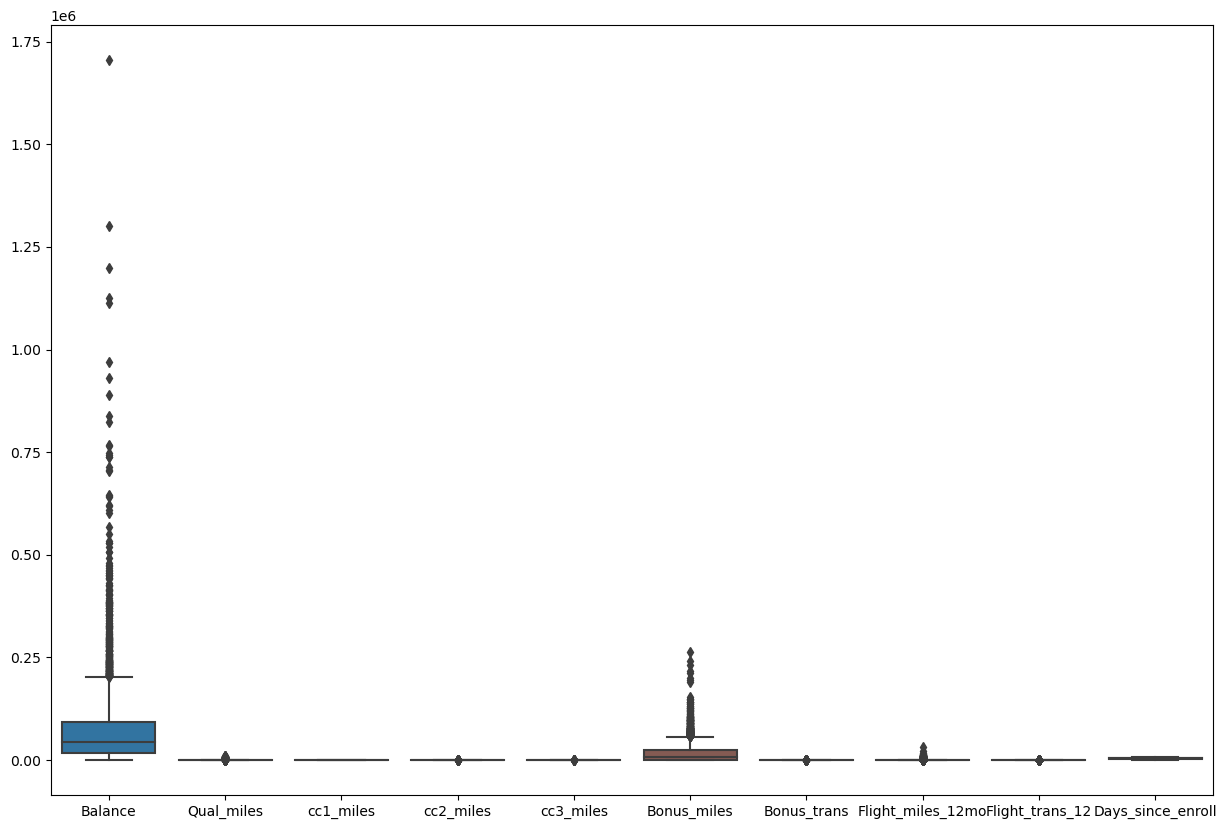

In [9]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df)
plt.show()

In [10]:
def remove_outliers(data):
     
    df = data.copy()
   
    for col in list(df.columns):
        
        Q1 = df[str(col)].quantile(0.05)
        Q3 = df[str(col)].quantile(0.95)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5*IQR
        upper_bound = Q3 + 1.5*IQR
 
        df = df[(df[str(col)] >= lower_bound) & (df[str(col)] <= upper_bound)]
   
        return df

In [11]:
cleaned_data = remove_outliers(df)


In [12]:
#Normalizing Dataset

from sklearn.preprocessing import StandardScaler
sd=StandardScaler()
df_scaled=sd.fit_transform(cleaned_data)

In [13]:
data=pd.DataFrame(df_scaled,columns=df.columns)

In [14]:
data.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,-0.526340,-0.183689,-0.767032,-0.098566,-0.060929,-0.708790,-1.102910,-0.324736,-0.358284,1.407388
1,-0.642199,-0.183689,-0.767032,-0.098566,-0.060929,-0.707051,-0.998161,-0.324736,-0.358284,1.391841
2,-0.354342,-0.183689,-0.767032,-0.098566,-0.060929,-0.541233,-0.788663,-0.324736,-0.358284,1.423907
3,-0.700369,-0.183689,-0.767032,-0.098566,-0.060929,-0.694958,-1.102910,-0.324736,-0.358284,1.384067
4,0.379920,-0.183689,1.422205,-0.098566,-0.060929,1.121059,1.515815,1.170823,0.713600,1.375808


In [19]:
# Finding the optimum value of eps 

from sklearn.neighbors import NearestNeighbors
nbrs = NearestNeighbors(n_neighbors = 6).fit(data)
# Find the k-neighbors of a point
neigh_dist, neigh_ind = nbrs.kneighbors(data)
# sort the neighbor distances (lengths to points) in ascending order
# axis = 0 represents sort along first axis i.e. sort along row
sort_neigh_dist = np.sort(neigh_dist, axis = 0)

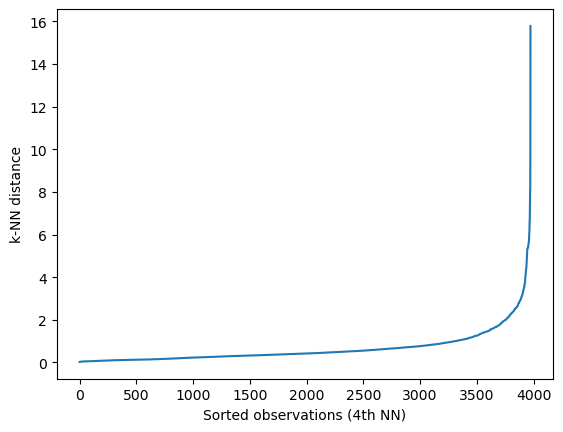

In [20]:
k_dist = sort_neigh_dist[:, 5]
plt.plot(k_dist)
plt.ylabel("k-NN distance")
plt.xlabel("Sorted observations (4th NN)")
plt.show()

In [22]:
!pip install kneed

In [23]:
# knee point can be occur between 2 and 5
#Additionally, to get an estimate of knee point, you can use the KneeLocator() function from the kneed package.


from kneed import KneeLocator
kneedle = KneeLocator(x = range(1, len(neigh_dist)+1), y = k_dist, S = 1.0, 
                      curve = "concave", direction = "increasing", online=True)

# get the estimate of knee point
print(kneedle.knee_y)


5.398629847905705


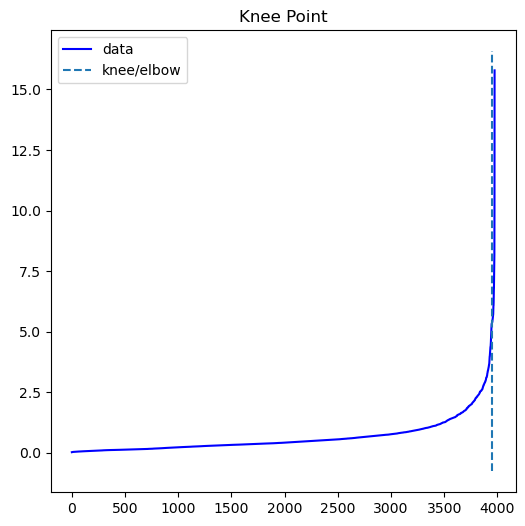

In [24]:
kneedle.plot_knee()
plt.show()

In [25]:
#we will use 5.39 as eps value

from sklearn.cluster import DBSCAN
clusters = DBSCAN(eps = 5.39, min_samples = 4).fit(data)
# get cluster labels
clusters.labels_



array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [26]:

set(clusters.labels_)


{-1, 0, 1, 2, 3}

In [27]:
from collections import Counter
Counter(clusters.labels_)

Counter({0: 3911, 3: 28, 1: 14, 2: 15, -1: 5})

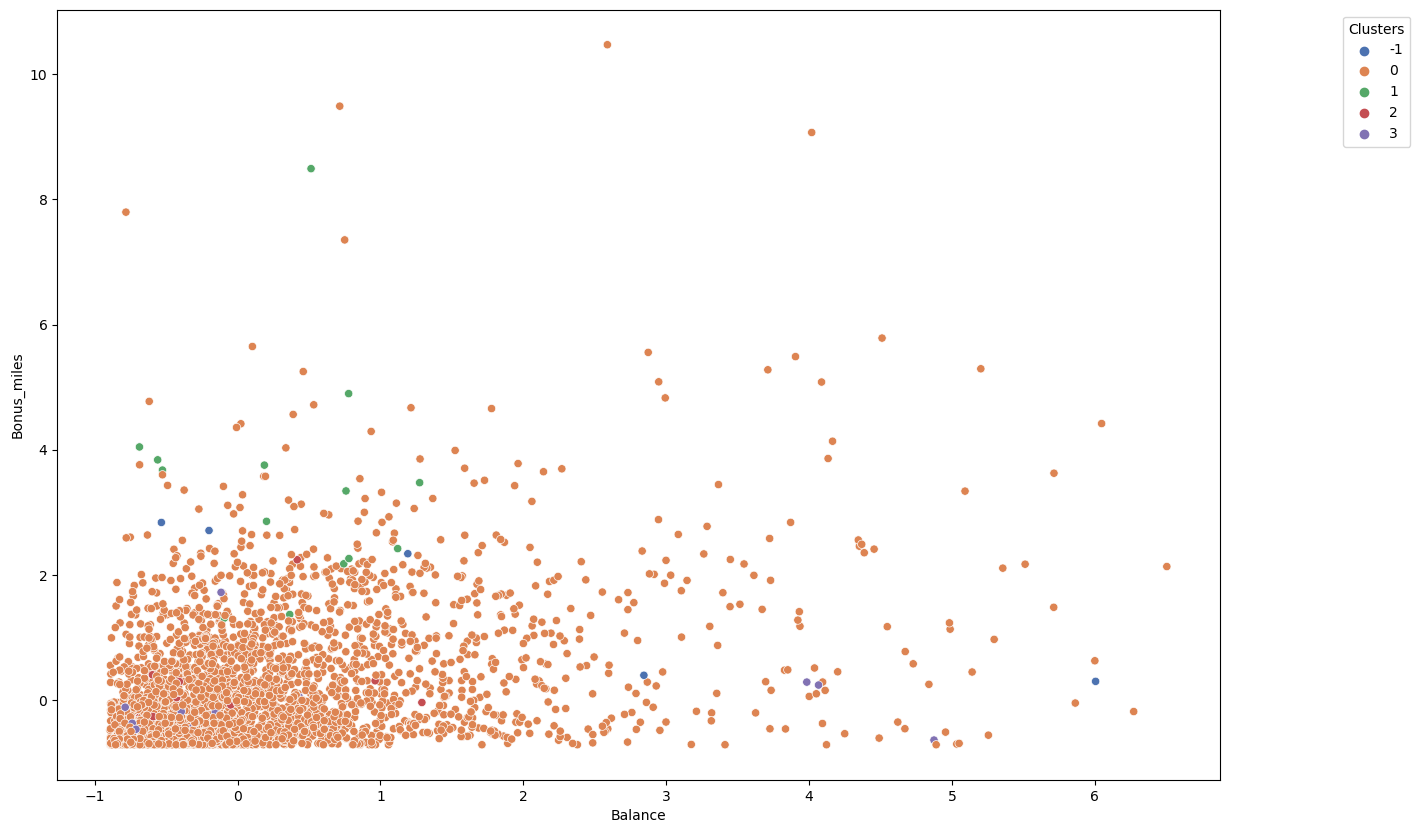

In [37]:
plt.figure(figsize=(15,10))
p = sns.scatterplot(data = data, x='Balance',y='Bonus_miles',hue = clusters.labels_, legend = "full", palette = "deep")
sns.move_legend(p, "upper right", bbox_to_anchor = (1.17, 1.), title = 'Clusters')
plt.show()